# World Wonders Identifier

## Jorge Alberto Padilla Gutierrez

# Imports

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import joblib
from collections import Counter

# Data import

Samples:  5519
Keys:  ['description', 'label', 'filename', 'data']
Description:  resized (32x32)world wonder images in rgb
Labels: ['Alhambra' 'Amundsen-Scott Research Station' 'Angkor Wat' 'Apadana'
 'Big Ben' 'Biosphere de Montreal' 'Bolshoi Theatre' 'Broadway'
 'Casa de Contratacion' 'Chichen Itza' 'Christ the Redeemer' 'Colosseum'
 'Colossus of Rhodes' 'Eiffel Tower' 'El Angel de la Independencia'
 'El Palacio de las Bellas Artes' 'Estadio do Maracana' 'Etemenaki'
 'Forbidden City' 'Golden Gate Bridge' 'Great Library of Alexandria'
 'Great Pyramid of Giza' 'Great Wall of China' 'Great Zimbabwe'
 'Greath Bath' 'Hagia Sophia' 'Hanging Gardens of Babylon' 'Hermitage'
 'Huey Teocalli' 'Jebel Barkal' 'Kilwa Kisiwani' 'Kotokou-in'
 'Leaning Tower of Pisa' 'Lighthouse of Alexandria' 'Machu Picchu'
 'Mahabodhi Temple' 'Mausoleum at Halicarnassus' 'Meenakshi Temple'
 'Mont St. Michel' 'Oracle of Delphi' 'Orszaghaz' 'Oxford University'
 'Panama Canal' 'Petra' 'Potala Palace' 'Ruhr Valley'
 '

/tmp/ipykernel_2813/3684873375.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


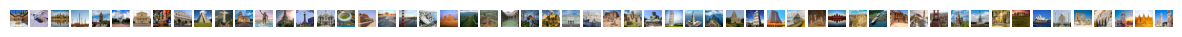

In [10]:
SIZE = 32

data = joblib.load(fr'{os.path.abspath(os.getcwd())}/../data/processed/World_Wonders_{SIZE}x{SIZE}.pkl')
print('Samples: ', len(data['data']))
print('Keys: ', list(data.keys()))
print('Description: ', data['description'])
print('Labels:', np.unique(data['label']))
print(Counter(data['label']))
# Print them with plt
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# Print only one for each label
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    
    ax.imshow(data['data'][idx])
    ax.axis('off')
    # ax.set_title(label)

Text(0.5, 1.0, 'El Angel de la Independencia')

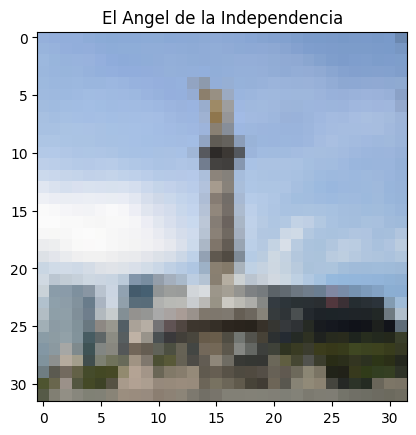

In [11]:
plt.imshow(data['data'][1340])
plt.title(data['label'][1340])

# Feature Engineering

In [12]:
X = np.array(data['data'], dtype=int)
print(X)
print(X.shape)

[[[[ 34  98 199]
   [ 34  97 200]
   [ 33  96 199]
   ...
   [ 81 106  68]
   [103  92  96]
   [ 70  36  21]]

  [[ 39 106 207]
   [ 37 102 203]
   [ 35  99 202]
   ...
   [ 98  85  54]
   [ 60  29  17]
   [146  92  61]]

  [[ 56 122 215]
   [ 43 110 210]
   [ 37 103 204]
   ...
   [ 70  36  24]
   [144  87  58]
   [166 107  73]]

  ...

  [[197 210 217]
   [177 187 193]
   [209 216 227]
   ...
   [202 216 226]
   [206 222 231]
   [187 204 216]]

  [[214 228 237]
   [209 224 234]
   [217 225 235]
   ...
   [206 220 232]
   [201 217 228]
   [203 220 231]]

  [[210 226 236]
   [218 231 240]
   [221 229 238]
   ...
   [207 222 234]
   [206 223 235]
   [183 204 223]]]


 [[[168 199 243]
   [167 199 243]
   [166 198 242]
   ...
   [181 205 245]
   [183 205 244]
   [184 205 244]]

  [[173 202 244]
   [171 201 244]
   [169 200 244]
   ...
   [185 208 246]
   [188 210 248]
   [190 211 249]]

  [[177 205 245]
   [176 205 245]
   [175 203 244]
   ...
   [153 146 151]
   [151 147 156]
   [171 177

In [13]:
le = preprocessing.LabelEncoder()
le.fit(data['label'])
y = np.array(le.transform(data['label']))
print(y)
print(y.shape)

[ 0  0  0 ... 56 56 56]
(5519,)


In [14]:
minmax = MinMaxScaler()
X = minmax.fit_transform((X).reshape(-1,1))
X = X.reshape(-1,SIZE,SIZE,3)
print(X)
print(X.shape)

[[[[0.13333333 0.38431373 0.78039216]
   [0.13333333 0.38039216 0.78431373]
   [0.12941176 0.37647059 0.78039216]
   ...
   [0.31764706 0.41568627 0.26666667]
   [0.40392157 0.36078431 0.37647059]
   [0.2745098  0.14117647 0.08235294]]

  [[0.15294118 0.41568627 0.81176471]
   [0.14509804 0.4        0.79607843]
   [0.1372549  0.38823529 0.79215686]
   ...
   [0.38431373 0.33333333 0.21176471]
   [0.23529412 0.11372549 0.06666667]
   [0.57254902 0.36078431 0.23921569]]

  [[0.21960784 0.47843137 0.84313725]
   [0.16862745 0.43137255 0.82352941]
   [0.14509804 0.40392157 0.8       ]
   ...
   [0.2745098  0.14117647 0.09411765]
   [0.56470588 0.34117647 0.22745098]
   [0.65098039 0.41960784 0.28627451]]

  ...

  [[0.77254902 0.82352941 0.85098039]
   [0.69411765 0.73333333 0.75686275]
   [0.81960784 0.84705882 0.89019608]
   ...
   [0.79215686 0.84705882 0.88627451]
   [0.80784314 0.87058824 0.90588235]
   [0.73333333 0.8        0.84705882]]

  [[0.83921569 0.89411765 0.92941176]
   [0.8

Text(0.5, 1.0, '14')

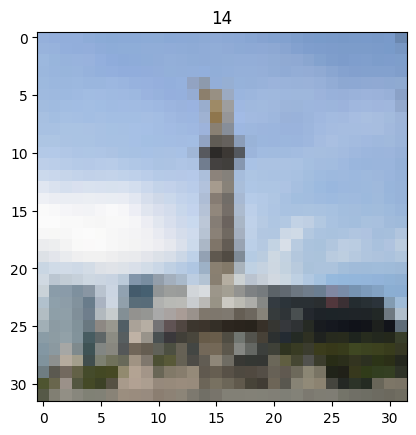

In [15]:
plt.imshow(X[1340])
plt.title(y[1340])

In [16]:
X_bw = rgb2gray(data['data'])
print(X_bw.shape)

(5519, 32, 32)


Text(0.5, 1.0, '14')

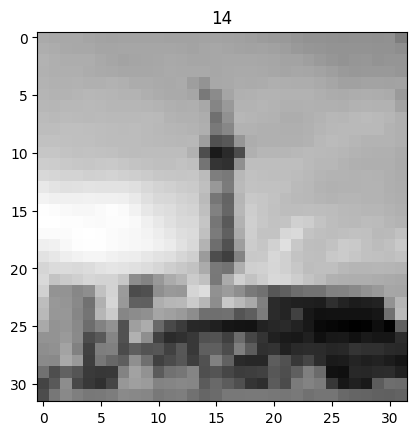

In [17]:
plt.imshow(X_bw[1340], cmap='gray')
plt.title(y[1340])

In [18]:
# Need to do 1 dimention for X
X = np.reshape(X, (len(X), -1, ))
print(X)
print(X.shape)

X_bw = np.reshape(X_bw, (len(X), -1, ))
print(X_bw)
print(X_bw.shape)

[[0.13333333 0.38431373 0.78039216 ... 0.71764706 0.8        0.8745098 ]
 [0.65882353 0.78039216 0.95294118 ... 0.24313725 0.27058824 0.20392157]
 [0.17254902 0.18431373 0.11372549 ... 0.10196078 0.14901961 0.00784314]
 ...
 [0.27843137 0.45490196 0.78823529 ... 0.05490196 0.47058824 0.69019608]
 [0.20392157 0.45490196 0.69019608 ... 0.08627451 0.47843137 0.68627451]
 [0.64313725 0.83921569 0.94117647 ... 0.05490196 0.4627451  0.67843137]]
(5519, 3072)
[[0.35953765 0.3570149  0.35309333 ... 0.86148118 0.86373608 0.78787216]
 [0.76699961 0.76616627 0.76224471 ... 0.22827176 0.2246549  0.25994824]
 [0.17672431 0.30564588 0.27924471 ... 0.14087333 0.13331294 0.12884078]
 ...
 [0.44143529 0.45822275 0.48228784 ... 0.4523349  0.44869608 0.39808863]
 [0.41853333 0.4106902  0.41599569 ... 0.42294941 0.42853765 0.41008353]
 [0.80490039 0.79876157 0.7875851  ... 0.46239529 0.4570898  0.39162941]]
(5519, 1024)


# PCA

In [21]:
pca = PCA(n_components=256)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
X_bw_pca = pca.fit_transform(X_bw)
print(X_bw_pca.shape)

(5519, 256)
(5519, 256)


# Algorithm

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_bw_train, X_bw_test, y_bw_train, y_bw_test = train_test_split(X_bw, y, test_size=0.2, shuffle=True, random_state=42)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, shuffle=True, random_state=42)
X_bw_pca_train, X_bw_pca_test, y_bw_pca_train, y_bw_pca_test = train_test_split(X_bw_pca, y, test_size=0.2, shuffle=True, random_state=42)

## KNeighborsClassifier

### GridSearchCV

In [ ]:
parameters = {
    'n_neighbors':[31,37,41,43,47,53,59,61,67,71,73,79]
}

model = KNeighborsClassifier()
grid = GridSearchCV(model, parameters, n_jobs=-1)
grid.fit(X_train, y_train)

In [167]:
model_knn = KNeighborsClassifier(n_neighbors=31, n_jobs=-1)
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)
print(accuracy_score(y_test, pred_knn))

0.12771739130434784


In [168]:
model_bw_knn = KNeighborsClassifier(n_neighbors=31, n_jobs=-1)
model_bw_knn.fit(X_bw_train, y_bw_train)
pred_bw_knn = model_bw_knn.predict(X_bw_test)
pred_bw_knn_proba = model_bw_knn.predict_proba(X_bw_test)
print(accuracy_score(y_bw_test, pred_bw_knn))

0.08967391304347826


## LogisticRegression

### GridSearchCV

In [70]:
parameters_log = {
    #'penalty':[None, 'l2'],
    'max_iter':[500, 600, 700, 800, 900]
    #'solver':['lbfgs', 'sag', 'saga']
}

model_log = LogisticRegression()
grid_log = GridSearchCV(model_log, parameters_log, n_jobs=-1)
grid_log.fit(X_train, y_train)

c:\Users\japadill\AppData\Local\anaconda3\envs\iteso2024\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [500, 600, 700, 800, 900]})

### LogisticRegressor with 3000 iterations

In [24]:
model_log = LogisticRegression(penalty='l2', max_iter=3000, n_jobs=-1)
model_log.fit(X_train, y_train)
pred_log = model_log.predict(X_test)
print(accuracy_score(y_test, pred_log))

0.2980072463768116


### LogisticRegression with 500 iterations

In [23]:
model = LogisticRegression(penalty='l2', max_iter=500, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.2980072463768116


/home/jorge/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### LogisticRegression with PCA 256 dimensions and 500 iterations

In [164]:
model_pca = LogisticRegression(penalty='l2', n_jobs=-1)
model_pca.fit(X_pca_train, y_pca_train)
pred_pca = model_pca.predict(X_pca_test)
print(accuracy_score(y_pca_test, pred_pca))

0.25


### LogisticRegression with B/W, PCA 256 dimensions and 500 iterations

In [165]:
model_bw_pca = LogisticRegression(penalty='l2', n_jobs=-1)
model_bw_pca.fit(X_bw_pca_train, y_bw_pca_train)
pred_bw_pca = model_bw_pca.predict(X_bw_pca_test)
print(accuracy_score(y_bw_pca_test, pred_bw_pca))

0.16847826086956522


## SGDClassifier

In [32]:
model_sgdc = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, max_iter=3000, eta0=0.0001, n_jobs=-1, random_state=42)
model_sgdc.fit(X_train, y_train)
pred_sgdc = model_sgdc.predict(X_test)
print(accuracy_score(y_test, pred_sgdc))

0.2536231884057971


## SVC

### GridSearchCV

In [ ]:
parameters_svc = {
    'C':[1.0, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['lineal', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'degree':[2,3,4,5,6,7,8],
    'gamma':['scale', 'auto'],
    'tol':[0.001, 0.0001],
}

model_parameters_svc = SVC()
grid_svc = GridSearchCV(model_log, parameters_log, n_jobs=-1)
grid_svc.fit(X_train, y_train)

### SVC with default config

In [37]:
model_svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', tol=0.001, max_iter=-1, random_state=42)
model_svc.fit(X_train, y_train)
pred_svc = model_svc.predict(X_test)
print(accuracy_score(y_test, pred_svc))

0.3423913043478261


# Experiments

In [ ]:
pca = PCA(n_components=256)
X_Surprise = pca.fit_transform(X)
print(X_Surprise.shape)
X_bw_Surprise = pca.fit_transform(X_bw)
print(X_bw_Surprise.shape)

(5519, 256)
(5519, 256)


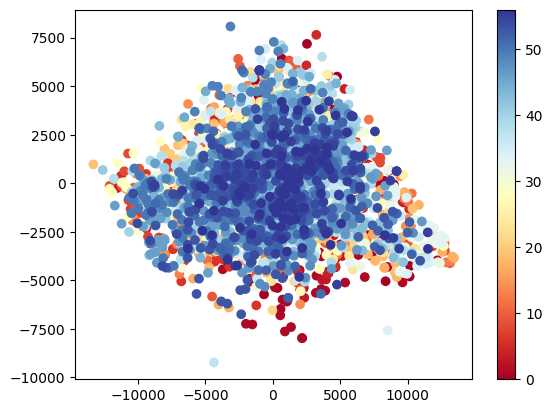

In [8]:
plt.scatter(X_Surprise[:, 0], X_Surprise[:, 1], c=y, cmap='RdYlBu')
plt.colorbar()

In [48]:
X_Surprise_train, X_Surprise_test, y_Surprise_train, y_Surprise_test = train_test_split(X_Surprise, y, test_size=0.2, shuffle=True, random_state=42)
X_bw_Surprise_train, X_bw_Surprise_test, y_bw_Surprise_train, y_bw_Surprise_test = train_test_split(X_bw_Surprise, y, test_size=0.2, shuffle=True, random_state=42)

model_pca = KNeighborsClassifier(n_neighbors=31, n_jobs=-1)
model_pca.fit(X_Surprise_train, y_Surprise_train)
pred_pca = model_pca.predict(X_Surprise_test)
pred_proba_pca = model_pca.predict_proba(X_Surprise_test)
print(accuracy_score(y_Surprise_test, pred_pca))

0.16576086956521738


In [49]:
model_bw_pca = KNeighborsClassifier(n_neighbors=31, n_jobs=-1)
model_bw_pca.fit(X_bw_Surprise_train, y_bw_Surprise_train)
pred_bw_pca = model_bw_pca.predict(X_bw_Surprise_test)
pred_bw_proba_pca = model_bw_pca.predict_proba(X_bw_Surprise_test)
print(accuracy_score(y_bw_Surprise_test, pred_bw_pca))

0.10778985507246377


In [46]:
model_log_pca = LogisticRegression(penalty='l2', n_jobs=-1)
model_log_pca.fit(X_Surprise_train, y_Surprise_train)
pred_log_pca = model_log_pca.predict(X_Surprise_test)
pred_proba_log_pca = model_log_pca.predict_proba(X_Surprise_test)
print(accuracy_score(y_Surprise_test, pred_log_pca))

0.24456521739130435


In [50]:
model_bw_log_pca = LogisticRegression(penalty='l2', n_jobs=-1)
model_bw_log_pca.fit(X_bw_Surprise_train, y_bw_Surprise_train)
pred_bw_log_pca = model_bw_log_pca.predict(X_bw_Surprise_test)
pred_bw_proba_log_pca = model_bw_log_pca.predict_proba(X_bw_Surprise_test)
print(accuracy_score(y_bw_Surprise_test, pred_bw_log_pca))

0.1793478260869565


In [74]:
parameters_pca = {
    'n_components':[2,3,4,8,16,32,64,128,256,512,1024,3072]
}

pipeline_pca = Pipeline(steps=[
    ('pca', PCA()),
    ('logistic', LogisticRegression())
])

parameters_grid = dict(pca__n_components = [2,3,4,8,16,32,64,128,256,512,1024,3072], logistic__penalty=['l2'], logistic__max_iter=[500])

model_pca = PCA()
grid_pca = GridSearchCV(pipeline_pca, parameters_grid, n_jobs=-1, error_score='raise')
grid_pca.fit(X_train, y_train)

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__max_iter': [500],
                         'logistic__penalty': ['l2'],
                         'pca__n_components': [2, 3, 4, 8, 16, 32, 64, 128, 256,
                                               512, 1024, 3072]})

# TSNE

In [81]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)
X_bw_tsne = tsne.fit_transform(X_bw)
print(X_bw_tsne.shape)

(5519, 2)
(5519, 2)


In [82]:
X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(X_tsne, y, test_size=0.2, shuffle=True, random_state=42)

model_tsne = LogisticRegression(penalty='l2', max_iter=500, n_jobs=-1)
model_tsne.fit(X_tsne_train, y_tsne_train)
pred_tsne = model_tsne.predict(X_tsne_test)
pred_proba_tsne = model_tsne.predict_proba(X_tsne_test)
print(accuracy_score(y_tsne_test, pred_tsne))

0.042572463768115944


In [51]:
#TODO: grid search on a pipeline of PCA and ALgorithm (Logistic)

In [ ]:
#TODO: SVC support? vector classifier
#TODO: SGDClassifier
#TODO: TSNE and UMAP